In [103]:
# import
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [104]:
# load the dataset 
dataset=pd.read_csv("./dataset/titanic.csv")

In [133]:
# for kaggle
test_ids = dataset["PassengerId"]

In [106]:
# get the dataset info
dataset.head()
dataset.info()
dataset.describe()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [107]:
# drop the cloumn Cabine for missing valuse too much
dataset=dataset.drop(columns="Cabin",axis=1)

In [108]:
# replace the missing valuse from Age column by mean value
dataset["Age"]=dataset["Age"].fillna(dataset["Age"].mean())

In [109]:
# check most use Embarked 
print(dataset["Embarked"].mode()[0])

S


In [110]:
# replace the missing valuse from Embarked column by mode value
dataset["Embarked"]= dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])

In [111]:
# check again
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [112]:
temp_dataset= dataset.select_dtypes(include=["number"])

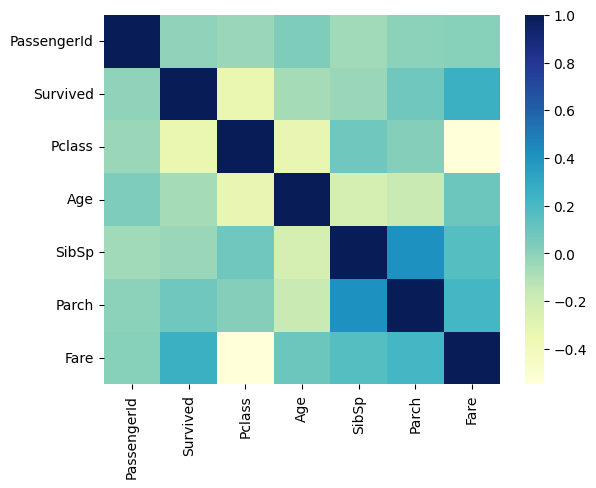

In [113]:
sns.heatmap(temp_dataset.corr(),cmap="YlGnBu")
plt.show()

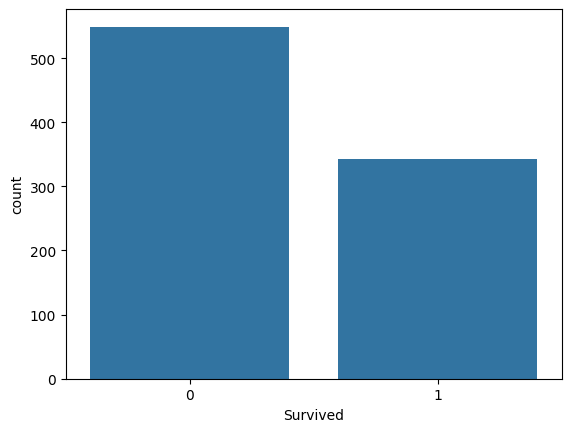

In [114]:
sns.countplot(x='Survived', data=dataset)
plt.show()


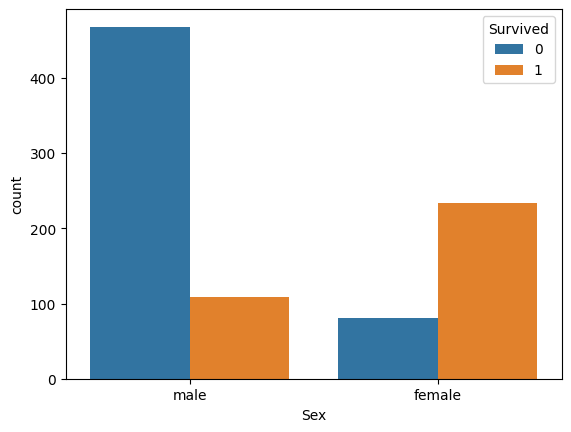

In [115]:
sns.countplot(x='Sex', hue="Survived", data=dataset)
plt.show()

In [116]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [117]:
# make the data for machine understandable 
# replace 1 & 0 with Sex and 0,1,2 with Embarked
dataset=dataset.replace({
    "Sex":{
        "male":0,
        "female":1
    },
    "Embarked":{
        "S":0,
        "C":1,
        "Q":2
    }
})

/tmp/ipykernel_6180/4283321204.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset=dataset.replace({


In [118]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [119]:
# separating featcher and target
X = dataset.drop(columns=["PassengerId","Name","Ticket","Survived"],axis=1)
Y = dataset["Survived"]

In [120]:
print(Y.head())
print(X.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [121]:
# now split train and test dataset
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2 ,random_state=10)

In [122]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [123]:
# train model using LogisticRegression linear_model
model= LogisticRegression(max_iter=10000)

In [124]:
# train the model
model.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


In [125]:
# predict the train dataset with model and get the accuracy score 
X_tarin_predict=model.predict(X_train)

In [126]:
print(X_tarin_predict)

[0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1
 1 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 1 0 

In [127]:
# get the accuracy score train dataset
train_accuracy_score = accuracy_score(Y_train,X_tarin_predict)
print("Accuracy score for tarin data set :",train_accuracy_score)

Accuracy score for tarin data set : 0.8061797752808989


In [128]:
# predict the test dataset with model and get the accuracy score
X_test_predict = model.predict(X_test)
print(X_test_predict)

[0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1]


In [129]:
# get the accuracy score for test dataset
test_accuracy_score = accuracy_score(Y_test,X_test_predict)
print("Accuracy score for test data set :",test_accuracy_score)

Accuracy score for test data set : 0.8268156424581006


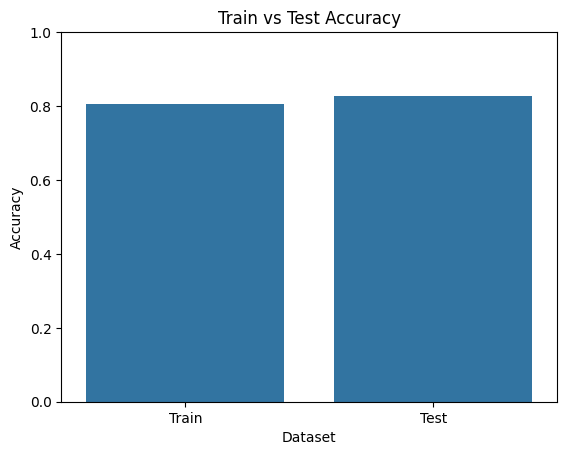

In [130]:
acc_df = pd.DataFrame({
    "Dataset": ["Train", "Test"],
    "Accuracy": [train_accuracy_score, test_accuracy_score]
})

sns.barplot(data=acc_df, x="Dataset", y="Accuracy", )
plt.ylim(0,1)
plt.title("Train vs Test Accuracy")
plt.show()

In [134]:
df=pd.DataFrame({
            "PassengerId":test_ids.values,
            "Survived":test_accuracy_score
})

In [135]:
df.to_csv("submission.csv",index=False)

In [136]:
df2= pd.read_csv("./submission.csv")

In [138]:
df2.shape

(891, 2)